In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import itertools
import wordcloud as wc
import matplotlib.ticker as ticker

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## U2M

In [ ]:
df_2006 = pd.read_json('/content/drive/MyDrive/classification/dataset/2006_USPTO.json')
df_2007 = pd.read_json('/content/drive/MyDrive/classification/dataset/2007_USPTO.json')
df_2008 = pd.read_json('/content/drive/MyDrive/classification/dataset/2008_USPTO.json')
df_2009 = pd.read_json('/content/drive/MyDrive/classification/dataset/2009_USPTO.json')
df_2010 = pd.read_json('/content/drive/MyDrive/classification/dataset/2010_USPTO.json')
df_2011 = pd.read_json('/content/drive/MyDrive/classification/dataset/2011_USPTO.json')
df_2012 = pd.read_json('/content/drive/MyDrive/classification/dataset/2012_USPTO.json')
df_2013 = pd.read_json('/content/drive/MyDrive/classification/dataset/2013_USPTO.json')
df_2014 = pd.read_json('/content/drive/MyDrive/classification/dataset/2014_USPTO.json')
df_2015 = pd.read_json('/content/drive/MyDrive/classification/dataset/2015_USPTO.json')






In [ ]:
df_2006['Abstract_length'] = df_2006['Abstract'].str.split().str.len()
df_2007['Abstract_length'] = df_2007['Abstract'].str.split().str.len()
df_2008['Abstract_length'] = df_2008['Abstract'].str.split().str.len()
df_2009['Abstract_length'] = df_2009['Abstract'].str.split().str.len()
df_2010['Abstract_length'] = df_2010['Abstract'].str.split().str.len()
df_2011['Abstract_length'] = df_2011['Abstract'].str.split().str.len()
df_2012['Abstract_length'] = df_2012['Abstract'].str.split().str.len()
df_2013['Abstract_length'] = df_2013['Abstract'].str.split().str.len()
df_2014['Abstract_length'] = df_2014['Abstract'].str.split().str.len()
df_2015['Abstract_length'] = df_2015['Abstract'].str.split().str.len()



In [ ]:
df = pd.concat([df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015], axis=0, ignore_index=True)

In [ ]:
df.shape

(2000147, 5)

In [ ]:
# type(df_2015.Subclass_labels[1])

In [ ]:
df.head()

,Subclass_labels,Abstract,Title,No,Abstract_length
0,[G11B],a magnetic disc unit having a rotating disc ty...,magnetic disc unit with range of gap between d...,US07072141,83
1,[A41D],methods and systems for transforming a volume ...,systems and methods for transformable suits,US06981282,75
2,[A41D],a gardening glove or the like designed to prev...,gardening gloves with cushion insert to protec...,US06981283,87
3,[A63B],a hockey helmet for receiving a head of a wear...,hockey helmet comprising a lateral adjustment ...,US06981284,185
4,[E03D],a toilet and toilet system suitable for a boat...,toilet and method of operation,US06981285,144


In [ ]:
# df_2015.Subclass_labels[0]

In [ ]:
df = df[reversed(df.columns)]

In [ ]:
df.head()

,Abstract_length,No,Title,Abstract,Subclass_labels
0,83,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,[G11B]
1,75,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,[A41D]
2,87,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,[A41D]
3,185,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,[A63B]
4,144,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,[E03D]


In [ ]:
stats_by_year = pd.DataFrame(index=range(2006,2016,1))

### Total number of patent published per year

In [ ]:
# number of patents per year 
year_2006 = df_2006.shape[0]
year_2007 = df_2007.shape[0]
year_2008 = df_2008.shape[0]
year_2009 = df_2009.shape[0]
year_2010 = df_2010.shape[0]
year_2011 = df_2011.shape[0]
year_2012 = df_2012.shape[0]
year_2013 = df_2013.shape[0]
year_2014 = df_2014.shape[0]
year_2015 = df_2015.shape[0]

In [ ]:
no_of_patent_by_year = {'2006':year_2006,
                        '2007':year_2007,
                        '2008':year_2008,
                        '2009':year_2009,
                        '2010':year_2010,
                        '2011':year_2011,
                        '2012':year_2012,
                        '2013':year_2013,
                        '2014':year_2014,
                        '2015':year_2015}

In [ ]:
stats_by_year['no_of_patent_by_year'] = no_of_patent_by_year.values()

In [ ]:
stats_by_year.head(10)

,no_of_patent_by_year
2006,175499
2007,158896
2008,159669
2009,168923
2010,221761
2011,226718
2012,255293
2013,280154
2014,303334
2015,49900


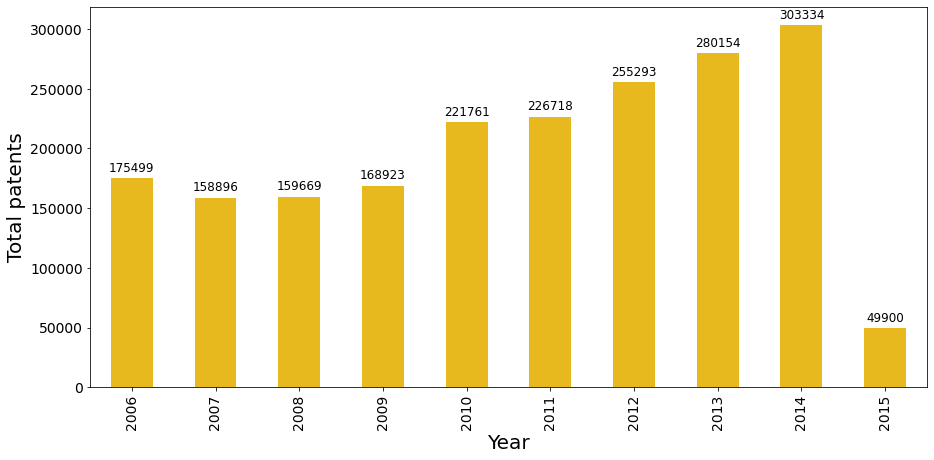

In [ ]:
ax = stats_by_year.iloc[0:,0].plot(kind='bar', figsize=(15,7),  color='#e8b91e', fontsize=14)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Total patents", fontsize=20)

for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax.figure.savefig('/content/drive/MyDrive/figures/classification/u2m_ap_patet_by_year_400.png', dpi=400, bbox_inches='tight', transparent=True, pad_inches=0) 
ax.figure.savefig('/content/drive/MyDrive/figures/classification/u2m_ap_patet_by_year_50.png', dpi=50, bbox_inches='tight', transparent=True, pad_inches=0)  


##### Task 

Figure out why in the year 2015 there are only 49900 patents


In [ ]:
df_2015.head(-1)

,Subclass_labels,Abstract,Title,No,Abstract_length
0,"[B64D, B64G]",a method of countering the effects of g forces...,aircrew ensembles,US08925112,100
1,"[A63B, A41D]",a protective hand covering has a membrane to c...,protective hand covering,US08925113,141
2,[A41C],a perspiration concealing brassiere having a b...,perspiration concealing brassiere,US08925114,126
3,"[A45F, A41D]",a first aid systems for an ultra compact first...,low profile medical kit,US08925115,76
4,"[A43B, A41D, A43C]",a decorative and or promotional accessory to b...,accessory for shoe laces hat brims and the like,US08925116,146
...,...,...,...,...,...
49894,[G01R],a method that automates the process of selecti...,method of optimizing magnetic resonance image ...,US08975892,20
49895,"[G09G, G03B, H01S, H04N]",a wavelength conversion device includes an exc...,wavelength conversion device and image display...,US08976203,149
49896,"[H05K, H01R]",an electronic device including an electronic u...,cable assembly and electronic device,US08976510,63
49897,"[H04J, G01R]",a current detection module generates a first c...,circuit and method for metering electricity,US08976819,140


In [ ]:
df.isnull().sum()

Abstract_length    0
No                 0
Title              0
Abstract           0
Subclass_labels    0
dtype: int64

In [ ]:
# plt.bar(range(len(no_of_patent_by_year)), list(no_of_patent_by_year.values()), align='center')
# plt.xticks(range(len(no_of_patent_by_year)), list(no_of_patent_by_year.keys()))
# plt.show()

### No. of unique labels by year

In [ ]:
uq_labels_2006 = set(itertools.chain.from_iterable(df_2006.Subclass_labels))
uq_labels_2007 = set(itertools.chain.from_iterable(df_2007.Subclass_labels))
uq_labels_2008 = set(itertools.chain.from_iterable(df_2008.Subclass_labels))
uq_labels_2009 = set(itertools.chain.from_iterable(df_2009.Subclass_labels))
uq_labels_2010 = set(itertools.chain.from_iterable(df_2010.Subclass_labels))
uq_labels_2011 = set(itertools.chain.from_iterable(df_2011.Subclass_labels))
uq_labels_2012 = set(itertools.chain.from_iterable(df_2012.Subclass_labels))
uq_labels_2013 = set(itertools.chain.from_iterable(df_2013.Subclass_labels))
uq_labels_2014 = set(itertools.chain.from_iterable(df_2014.Subclass_labels))
uq_labels_2015 = set(itertools.chain.from_iterable(df_2015.Subclass_labels))

print(len(uq_labels_2015))

606


In [ ]:
no_of_subclass_by_year = {'2006':len(uq_labels_2006),
                        '2007':len(uq_labels_2007),
                        '2008':len(uq_labels_2008),
                        '2009':len(uq_labels_2009),
                        '2010':len(uq_labels_2010),
                        '2011':len(uq_labels_2011),
                        '2012':len(uq_labels_2012),
                        '2013':len(uq_labels_2013),
                        '2014':len(uq_labels_2014),
                        '2015':len(uq_labels_2015)}

In [ ]:
stats_by_year['no_of_subclass_by_year'] = no_of_subclass_by_year.values()

In [ ]:
stats_by_year.head(10)

,no_of_patent_by_year,no_of_subclass_by_year
2006,175499,613
2007,158896,608
2008,159669,606
2009,168923,610
2010,221761,611
2011,226718,613
2012,255293,617
2013,280154,611
2014,303334,622
2015,49900,606


In [ ]:
# plt.bar(range(len(no_of_subclass_by_year)), list(no_of_subclass_by_year.values()), align='center')
# plt.xticks(range(len(no_of_subclass_by_year)), list(no_of_subclass_by_year.keys()))
# plt.show()

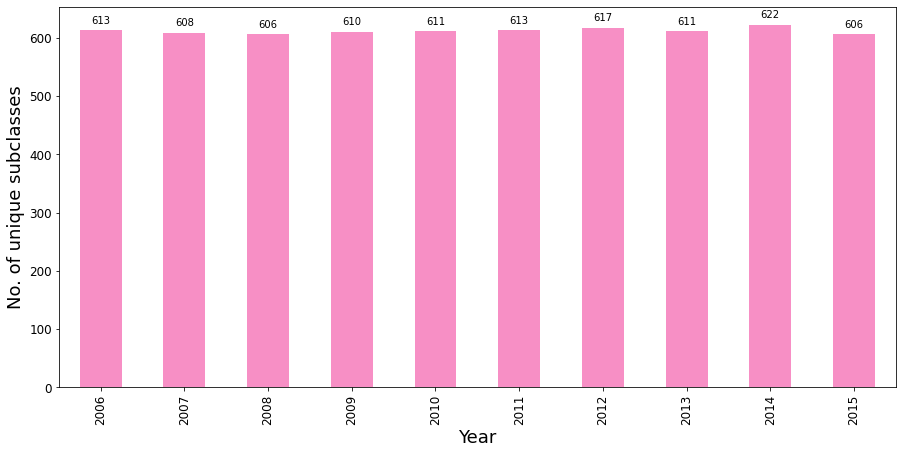

In [ ]:
ax = stats_by_year.iloc[0:,1].plot(kind='bar', figsize=(15,7), color='#f78fc5', fontsize=12)
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("No. of unique subclasses", fontsize=18)

for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.figure.savefig('/content/drive/MyDrive/figures/classification/u2m_no_of_subclass_per_year_400.png', dpi=400, bbox_inches='tight', transparent=True, pad_inches=0) 
ax.figure.savefig('/content/drive/MyDrive/figures/classification/u2m_no_of_subclass_per_year_50.png', dpi=50, bbox_inches='tight', transparent=True, pad_inches=0)  

### No of average patents for labels 

In [ ]:
stats_by_year['no_of_avg_labels_per_patent'] = stats_by_year['no_of_patent_by_year'] // stats_by_year['no_of_subclass_by_year']

In [ ]:
stats_by_year.head(10)

,no_of_patent_by_year,no_of_subclass_by_year,no_of_avg_labels_per_patent
2006,175499,613,286
2007,158896,608,261
2008,159669,606,263
2009,168923,610,276
2010,221761,611,362
2011,226718,613,369
2012,255293,617,413
2013,280154,611,458
2014,303334,622,487
2015,49900,606,82


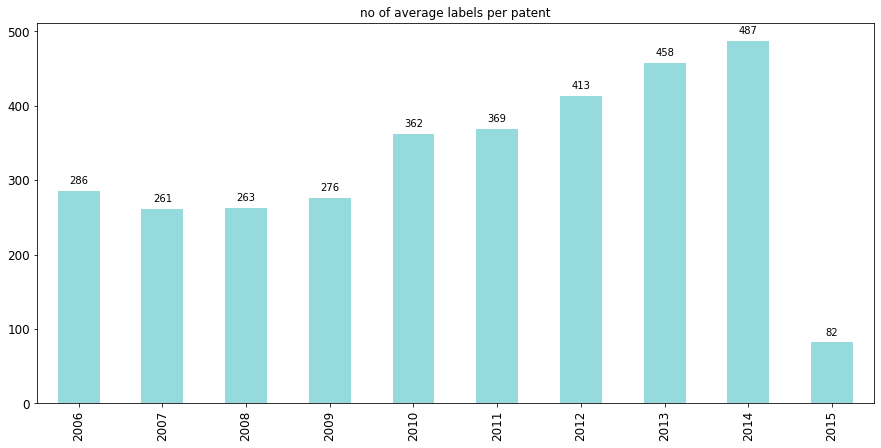

In [ ]:
ax = stats_by_year.iloc[0:,2].plot(kind='bar', figsize=(15,7), title = 'no of average labels per patent', color='#95dbde', fontsize=12)
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

### Distribution of labels

In [ ]:
df['total_subclasses'] = df.Subclass_labels.str.len()

In [ ]:
df['total_subclasses'].max()

18

In [ ]:
df.head()

,Abstract_length,No,Title,Abstract,Subclass_labels,total_subclasses
0,83,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,[G11B],1
1,75,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,[A41D],1
2,87,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,[A41D],1
3,185,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,[A63B],1
4,144,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,[E03D],1


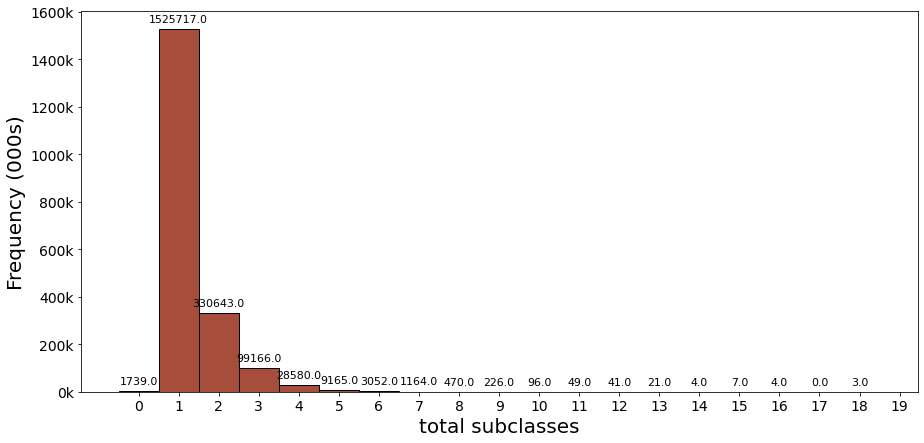

In [ ]:
ax = df.iloc[0:,5].plot(kind='hist', bins=np.arange(20) - 0.5,figsize=(15,7),edgecolor='black', color='#a64d3c', fontsize=14)
ax.set_xlabel("total subclasses", fontsize=20)

ax.set_xticks(range(20))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda y, pos: '%.0fk' % (y * 1e-3)))
ax.set_ylabel('Frequency (000s)',fontsize=20)

for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=11)

ax.figure.savefig('/content/drive/MyDrive/figures/classification/u2m_frequency_of_subclasse_400.png', dpi=400, bbox_inches='tight', transparent=True, pad_inches=0) 
ax.figure.savefig('/content/drive/MyDrive/figures/classification/u2m_frequency_of_subclasse_50.png', dpi=50, bbox_inches='tight', transparent=True, pad_inches=0)    

In [ ]:
df['total_subclasses'].min()

0

In [ ]:
df[df['total_subclasses']==0]

,Abstract_length,No,Title,Abstract,Subclass_labels,total_subclasses
655,89,US07032907,creeper,a creeper having a pair of relatively large di...,[],0
1024,122,US07033266,device and method for controlling the beginnin...,in a device and method for controlling the com...,[],0
1221,99,US07033458,process for improving interfacial adhesion in ...,a method for improving adhesion between two ad...,[],0
1943,104,US07034191,continuous crystallization process,a continuous crystallization process comprisin...,[],0
2099,146,US07034341,semiconductor laser device having a multi laye...,an algaas based semiconductor laser is formed ...,[],0
...,...,...,...,...,...,...
1639963,61,US08431473,method for fabricating semiconductor device,a method for fabricating a semiconductor devic...,[],0
1641944,133,US08467935,automobile electronic control unit comprising ...,an electronic control unit for a motor vehicle...,[],0
1646305,113,US08531748,lens system for common aperture holographic st...,the present invention relates to a lens system...,[],0
1746151,126,US08897098,time information obtaining device and radio co...,a time information obtaining device and a radi...,[],0


In [ ]:
df[df['total_subclasses']==18]

,Abstract_length,No,Title,Abstract,Subclass_labels,total_subclasses
912196,96,US07943699,ethylene copolymer modified oriented polyester...,disclosed are films tapes and melt spun fibers...,"[B32B, C08F, A43B, D02G, A61F, C08J, A01K, D04...",18
997018,45,US07956101,anaerobically compostable polymeric compositio...,compostable hydrocarbon polymers composites an...,"[B32B, C08F, A61K, B60C, B29C, C08J, D06N, C08...",18
1581425,99,US08513332,ink composition for color filter method for pr...,disclosed is a color filter ink composition th...,"[B32B, A61L, C08F, A61K, G03F, C02F, C03C, C09...",18


### Average length of text and title

In [ ]:
df['Title_length'] = df['Title'].str.split().str.len() 

In [ ]:
df.head()

,Abstract_length,No,Title,Abstract,Subclass_labels,total_subclasses,Title_length
0,83,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,[G11B],1,11
1,75,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,[A41D],1,6
2,87,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,[A41D],1,8
3,185,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,[A63B],1,7
4,144,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,[E03D],1,5


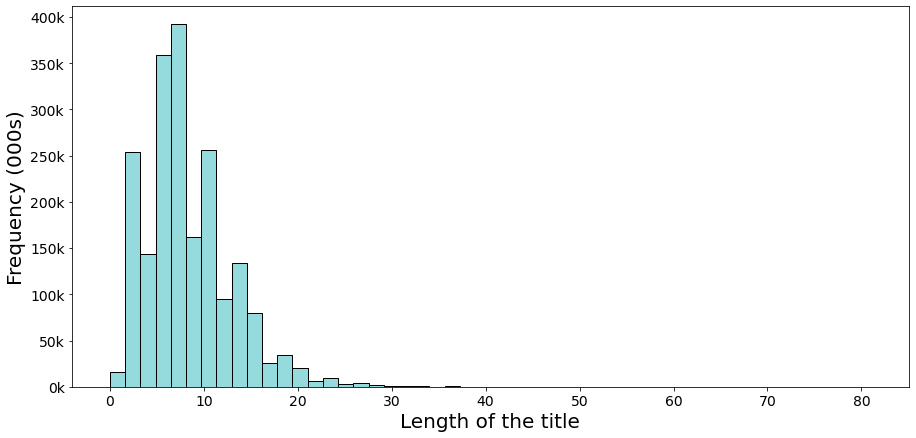

In [ ]:
ax = df.iloc[0:,6].plot(kind='hist', bins=50, figsize=(15,7),edgecolor='black', color='#95dbde', fontsize=14)
ax.set_xlabel("Length of the title", fontsize=20)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda y, pos: '%.0fk' % (y * 1e-3)))
ax.set_ylabel('Frequency (000s)',fontsize=20)

ax.figure.savefig('/content/drive/MyDrive/figures/classification/u2m_frequency_distribution_of_title_length_400.png', dpi=400, bbox_inches='tight', transparent=True, pad_inches=0) 
ax.figure.savefig('/content/drive/MyDrive/figures/classification/u2m_frequency_distribution_of_title_length_50.png', dpi=50, bbox_inches='tight', transparent=True, pad_inches=0)  

In [ ]:
len(df[df['Title_length'] == 0])

4551

In [ ]:
df['Title_length'].max()

81

In [ ]:
df[df['Title_length']==1]

,Abstract_length,No,Title,Abstract,Subclass_labels,total_subclasses,Title_length
27,106,US06981466,milking,a milk metering apparatus having a metering ch...,[A01J],1,1
83,46,US07032316,scissors,a pair of scissors includes a left member a ri...,[B26B],1,1
110,70,US07032345,crimp,a crimp usable in attaching terminal tackle su...,"[F16G, A01K]",2,1
284,109,US07032531,kayak,the kayak has a cargo hold with a forward hatc...,[B63B],1,1
441,103,US07032698,hovercraft,a hovercraft is capable of operation on either...,[B60V],1,1
...,...,...,...,...,...,...,...
1999541,135,US08974469,snare,a snare for snaring an article in a vessel of ...,[A61B],1,1
1999642,84,US08974576,co,the disclosure relates to a continuous or semi...,[B01D],1,1
1999647,116,US08974582,co,a corecovery system includes an absorber and a...,[B01D],1,1
1999897,15,US08974829,embolization,a particle includes a ferromagnetic material a...,"[A61L, A61B, A61K]",3,1


In [ ]:
df[df['Title_length']==81]
df.iloc[1205672,2]

# print(df.iloc[756344,2])

# df['Title_length'].max()

'digital image capture and processing system having a single printed circuit pc board with a light transmission aperture wherein a first linear array of visible light emitting diodes leds are mounted on the rear side of the pc board for producing a linear targeting illumination beam and wherein a second linear array of visible leds are mounted on the front side of said pc board for producing a field of visible illumination within the field of view fov of the system'

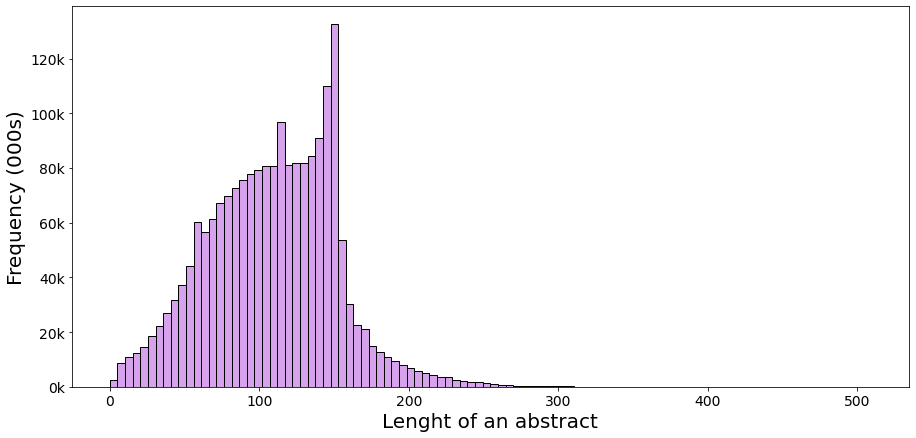

In [ ]:
ax = df.iloc[0:,0].plot(kind='hist', bins=100, figsize=(15,7), edgecolor='black', color='#d5a2eb', fontsize=14)

ax.set_xlabel("Lenght of an abstract", fontsize=20)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda y, pos: '%.0fk' % (y * 1e-3)))
ax.set_ylabel('Frequency (000s)',fontsize=20)

ax.figure.savefig('/content/drive/MyDrive/figures/classification/u2m_frequency_distribution_of_abstract_length_400.png', dpi=400, bbox_inches='tight', transparent=True, pad_inches=0) 
ax.figure.savefig('/content/drive/MyDrive/figures/classification/u2m_frequency_distribution_of_abstract_length_50.png', dpi=50, bbox_inches='tight', transparent=True, pad_inches=0)  

In [ ]:
len(df[df['Abstract_length'] == 0])

19

In [ ]:
df['Abstract_length'].max()

509

### Top-3 patent s by year 

In [ ]:
df_2006_e = df_2006.explode('Subclass_labels',ignore_index=True)
df_2007_e = df_2007.explode('Subclass_labels',ignore_index=True)
df_2008_e = df_2008.explode('Subclass_labels',ignore_index=True)
df_2009_e = df_2009.explode('Subclass_labels',ignore_index=True)
df_2010_e = df_2010.explode('Subclass_labels',ignore_index=True)
df_2011_e = df_2011.explode('Subclass_labels',ignore_index=True)
df_2012_e = df_2012.explode('Subclass_labels',ignore_index=True)
df_2013_e = df_2013.explode('Subclass_labels',ignore_index=True)
df_2014_e = df_2014.explode('Subclass_labels',ignore_index=True)
df_2015_e = df_2015.explode('Subclass_labels',ignore_index=True)


In [ ]:
df_2015_e.head(10)

,Subclass_labels,Abstract,Title,No,Abstract_length
0,B64D,a method of countering the effects of g forces...,aircrew ensembles,US08925112,100
1,B64G,a method of countering the effects of g forces...,aircrew ensembles,US08925112,100
2,A63B,a protective hand covering has a membrane to c...,protective hand covering,US08925113,141
3,A41D,a protective hand covering has a membrane to c...,protective hand covering,US08925113,141
4,A41C,a perspiration concealing brassiere having a b...,perspiration concealing brassiere,US08925114,126
5,A45F,a first aid systems for an ultra compact first...,low profile medical kit,US08925115,76
6,A41D,a first aid systems for an ultra compact first...,low profile medical kit,US08925115,76
7,A43B,a decorative and or promotional accessory to b...,accessory for shoe laces hat brims and the like,US08925116,146
8,A41D,a decorative and or promotional accessory to b...,accessory for shoe laces hat brims and the like,US08925116,146
9,A43C,a decorative and or promotional accessory to b...,accessory for shoe laces hat brims and the like,US08925116,146


In [ ]:
df_2006_e['Subclass_labels'].value_counts()[-3:]

B44B    1
F23H    1
F16T    1
Name: Subclass_labels, dtype: int64

In [ ]:
top_3_patent_subclass = {'2006': df_2006_e['Subclass_labels'].value_counts()[:3].to_dict(),
                         '2007': df_2007_e['Subclass_labels'].value_counts()[:3].to_dict(),
                         '2008': df_2008_e['Subclass_labels'].value_counts()[:3].to_dict(),
                         '2009': df_2009_e['Subclass_labels'].value_counts()[:3].to_dict(),
                         '2010': df_2010_e['Subclass_labels'].value_counts()[:3].to_dict(),
                         '2011': df_2011_e['Subclass_labels'].value_counts()[:3].to_dict(),
                         '2012': df_2012_e['Subclass_labels'].value_counts()[:3].to_dict(),
                         '2013': df_2013_e['Subclass_labels'].value_counts()[:3].to_dict(),
                         '2014': df_2014_e['Subclass_labels'].value_counts()[:3].to_dict(),
                         '2015': df_2015_e['Subclass_labels'].value_counts()[:3].to_dict()}

In [ ]:
top_3_patent_subclass

{'2006': {'A61K': 6208, 'G06F': 20048, 'H01L': 10767},
 '2007': {'A61K': 5683, 'G06F': 17926, 'H01L': 10519},
 '2008': {'A61K': 5523, 'G06F': 20032, 'H01L': 10341},
 '2009': {'A61K': 6147, 'G06F': 22978, 'H01L': 11602},
 '2010': {'A61K': 8443, 'G06F': 30922, 'H01L': 15657},
 '2011': {'A61K': 8305, 'G06F': 31574, 'H01L': 15765},
 '2012': {'A61K': 9866, 'G06F': 37594, 'H01L': 14937},
 '2013': {'A61K': 11624, 'G06F': 41711, 'H01L': 17230},
 '2014': {'G06F': 50146, 'H01L': 21531, 'H04L': 17846},
 '2015': {'G06F': 8945, 'H01L': 4108, 'H04L': 4172}}

In [ ]:
stats_by_year['top_3_patent_subclass'] = top_3_patent_subclass.values()

In [ ]:
stats_by_year

,no_of_patent_by_year,no_of_subclass_by_year,no_of_avg_labels_per_patent,top_3_patent_subclass
2006,175499,613,286,"{'G06F': 20048, 'H01L': 10767, 'A61K': 6208}"
2007,158896,608,261,"{'G06F': 17926, 'H01L': 10519, 'A61K': 5683}"
2008,159669,606,263,"{'G06F': 20032, 'H01L': 10341, 'A61K': 5523}"
2009,168923,610,276,"{'G06F': 22978, 'H01L': 11602, 'A61K': 6147}"
2010,221761,611,362,"{'G06F': 30922, 'H01L': 15657, 'A61K': 8443}"
2011,226718,613,369,"{'G06F': 31574, 'H01L': 15765, 'A61K': 8305}"
2012,255293,617,413,"{'G06F': 37594, 'H01L': 14937, 'A61K': 9866}"
2013,280154,611,458,"{'G06F': 41711, 'H01L': 17230, 'A61K': 11624}"
2014,303334,622,487,"{'G06F': 50146, 'H01L': 21531, 'H04L': 17846}"
2015,49900,606,82,"{'G06F': 8945, 'H04L': 4172, 'H01L': 4108}"


In [ ]:
text = " ".join(abstract for abstract in df_2015.Abstract)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 33072191 words in the combination of all review.


In [ ]:
from collections import Counter
Counter(" ".join(df_2015["Abstract"]).split()).most_common(10)

[('the', 455604),
 ('a', 346746),
 ('of', 192063),
 ('and', 167827),
 ('to', 144094),
 ('is', 84256),
 ('in', 79319),
 ('an', 73910),
 ('for', 60154),
 ('first', 49126)]

In [ ]:
text_tokens = word_tokenize(text)

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stopwordss = set(stopwords.words('english'))
stopwordss.update(["first", "second", "first second","using", "including", "wherein", "least one", "least", "one"])

# Generate a word cloud image
wordcloud = wc.WordCloud(stopwords=stopwordss, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:

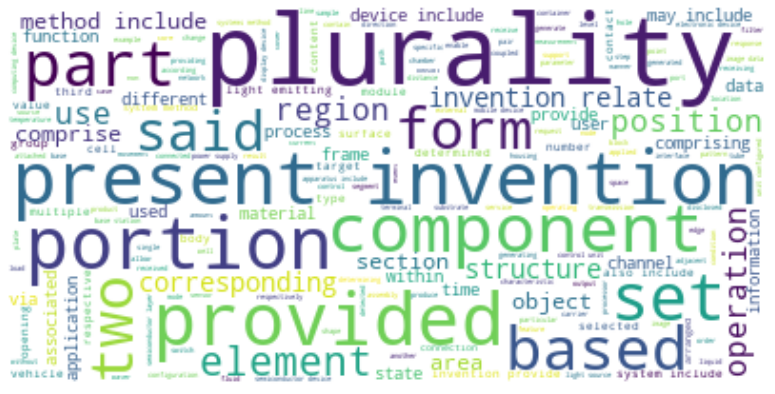

In [ ]:
plt.figure(figsize=[15,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.savefig('/content/drive/MyDrive/figures/classification/u2m_word_cloud_400.png', dpi=400, bbox_inches='tight', transparent=True, pad_inches=0) 
plt.savefig('/content/drive/MyDrive/figures/classification/u2m_word_cloud_50.png', dpi=50, bbox_inches='tight', transparent=True, pad_inches=0) 
plt.show()